# Compare habituation curve differences statistically
Conny Lin | July 4, 2020

## Background research 
[How to statistically compare two time series?](https://stats.stackexchange.com/questions/19103/how-to-statistically-compare-two-time-series/19334)
*  identify a common model that would reasonably describe each series separately. This might be an ARIMA model or a multiply-trended Regression Model with possible Level Shifts or a composite model integrating both memory (ARIMA) and dummy variables. This common model could be estimated globally and separately for each of the two series and then one could construct an F test to test the hypothesis of a common set of parameters.

[Lecture USYD mathmatics - compare 2 time seires](http://www.maths.usyd.edu.au/u/jchan/Consult/W10_CompareTwoTimeSeries.pdf):
* use ARMA to model 
* use Granger's test for stats

Python library: [Time Series tsa from statsmodels](https://www.statsmodels.org/stable/tsa.html):
* [grangercausalitytests](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html#statsmodels.tsa.stattools.grangercausalitytests)

Hausdorff-distance, Fréchet distance, Kolmogorov-Smirnov statistic, or any kind of Sum-of-squares statistic (Hogendoorn, Bram. (2016). Re: Is there any statistical method to compare two curves in a graph? e.g. quantifying how similar/different they are.. Retrieved from: https://www.researchgate.net/post/Is_there_any_statistical_method_to_compare_two_curves_in_a_graph_eg_quantifying_how_similar_different_they_are/583eceb5dc332d51c77f3271/citation/download.)
* 

## test granger test with statsmodel data

In [3]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
data = sm.datasets.macrodata.load_pandas()
data = data.data[['realgdp', 'realcons']].pct_change().dropna()

In [2]:
data

,realgdp,realcons
1,0.025256,0.015404
2,-0.001192,0.010440
3,0.003501,0.001085
4,0.022438,0.009580
5,-0.004674,0.012652
...,...,...
198,-0.006758,-0.008908
199,-0.013710,-0.007812
200,-0.016475,0.001512
201,-0.001850,-0.002193


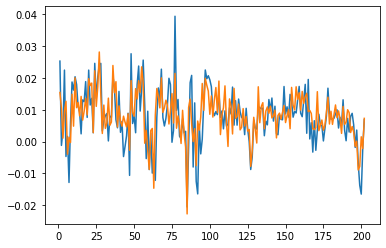

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data['realgdp'])
plt.plot(data['realcons'])
plt.show()

In [5]:
# test granger
granger_test_result = grangercausalitytests(data, maxlag=12, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=29.1600 , p=0.0000  , df=1
likelihood ratio test: chi2=27.2295 , p=0.0000  , df=1
parameter F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=38.9498 , p=0.0000  , df=2
likelihood ratio test: chi2=35.5873 , p=0.0000  , df=2
parameter F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=41.9812 , p=0.0000  , df=3
likelihood ratio test: chi2=38.0914 , p=0.0000  , df=3
parameter F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=10.9646 , p=0.0000  

In [7]:
granger_test_result = grangercausalitytests(data, maxlag=1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=29.1600 , p=0.0000  , df=1
likelihood ratio test: chi2=27.2295 , p=0.0000  , df=1
parameter F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1


## Distances

**Hausdorff-distance**

measures how far two subsets of a metric space are from each other. It turns the set of non-empty compact subsets of a metric space into a metric space in its own right. It is named after Felix Hausdorff. ([Wiki](https://en.wikipedia.org/wiki/Hausdorff_distance#:~:text=The%20Hausdorff%20distance%20is%20the,point%20in%20the%20other%20set.))

<img src="https://en.wikipedia.org/wiki/File:Hausdorff_distance_sample.svg"  width=500>

* Fréchet distance, 
* Kolmogorov-Smirnov statistic

Curve matching paper: http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=1E626E76AA499B64ED0D34C40C524B62?doi=10.1.1.118.5078&rep=rep1&type=pdf

A similarity analysis of curves: https://onlinelibrary.wiley.com/doi/abs/10.2307/3316142
PDF in evernote: https://www.evernote.com/shard/s55/nl/5890969/0a31ce38-6358-4a29-bb4d-97273f06c4bd/

dynamic time wraping
* https://stackoverflow.com/questions/6723157/how-to-compare-two-curves-arrays-of-points
* https://en.wikipedia.org/wiki/Dynamic_time_warping

[Time series analysis](https://en.wikipedia.org/wiki/Time_series) seems to suggest [cross-correlation](https://en.wikipedia.org/wiki/Cross-correlation) is what we need: in signal processing, cross-correlation is a measure of similarity of two series as a function of the displacement of one relative to the other. 

[This](https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9) article talks about 4 options: pearson correlation, time lagged cross-correlation (TLCC), dynamic time warping (DTW) and instantaneous phase synchrony. (Including jupyter notebook)

## Try Pearson R

In [6]:
# import library
import os, glob, sys
import numpy as np
import pandas as pd
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import data
# global variables
# project directory data is located in the same directory of this code
DATA_DIR = os.path.join(os.path.dirname( os.getcwd()), 'data') # used to be proj_dir
# define save suffix for this project
PRJ_TAG = 'integral_diff' # used to be proj_suffix
# define measures, statistical setting
MEASURES = ['RevFreq','RevSpeed','RevDur']
pvlimit = 0.001
alpha = 0.05

In [7]:
# load data
data = pd.read_csv( os.path.join(DATA_DIR, 'rawdata.csv'))
df_db = pd.read_csv( os.path.join(DATA_DIR, 'mwtdb.csv'))
df_db.loc[df_db['rx'].isna(),'rx'] = ['0mM']
# merge database
data = data.merge(df_db[['mwtid','strain','rx']],left_on='mwtid', right_on='mwtid', how='left')

# transform dataset
values = MEASURES.copy()
values.append('rx')
df = data.copy()
df.drop(columns='strain', inplace=True)
df = df.pivot(index='mwtid', columns='tap', values=values)
df.insert(0, 'etoh', df['rx'][1])
df.drop(columns='rx', inplace=True)
df.set_index('etoh', append=True, inplace=True)
df = df.astype('float')

In [8]:
# calculate mean hab curve per group
df_curve_mean = df.groupby(level='etoh').mean()
# transform format
df_curve_mean = df_curve_mean.transpose().unstack(level=0).transpose().swaplevel(0,1).transpose()

In [9]:
df_curve_mean

,RevFreq,RevSpeed,RevDur,RevFreq,RevSpeed,RevDur
etoh,0mM,0mM,0mM,400mM,400mM,400mM
tap,,,,,,
1,0.851082,0.276395,2.672576,0.658177,0.294906,2.317330
2,0.718330,0.252556,2.328908,0.556851,0.288171,1.907718
3,0.692562,0.250306,2.070349,0.519671,0.285316,1.749951
4,0.678352,0.247250,1.909563,0.469526,0.281289,1.645874
5,0.653175,0.239257,1.778603,0.430833,0.274039,1.570437
6,0.628644,0.235457,1.683712,0.388127,0.270543,1.471602
7,0.613306,0.229610,1.613188,0.357170,0.267881,1.457184
8,0.593892,0.227832,1.571485,0.333137,0.266823,1.450194


In [10]:
# do pearson comparison per measure
import scipy.stats as stats

for msr in MEASURES:
    r, p = stats.pearsonr(df_curve_mean[msr]['0mM'], df_curve_mean[msr]['400mM'])
    print(f"{msr}: Pearson r: {r:.3f} and p-value: {p:.3f}")


RevFreq: Pearson r: 0.977 and p-value: 0.000
RevSpeed: Pearson r: 0.982 and p-value: 0.000
RevDur: Pearson r: 0.972 and p-value: 0.000


Doesn't work that well.

## Try DTW

https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9


RevFreq


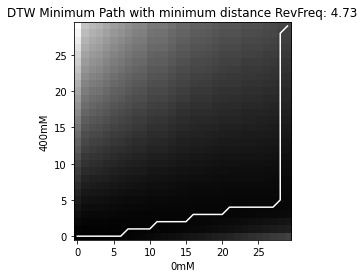

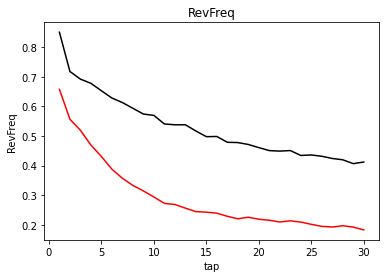


RevSpeed


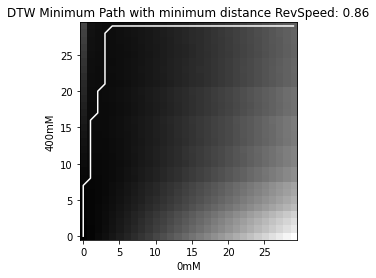

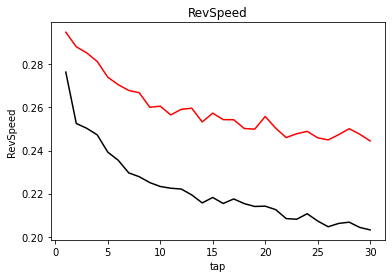


RevDur


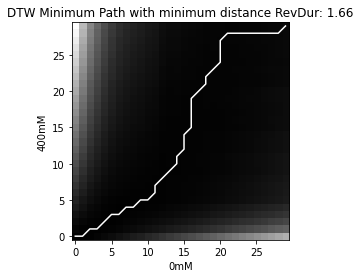

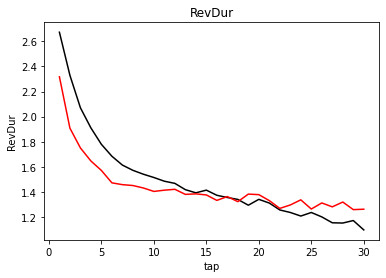

In [14]:
from dtw import dtw,accelerated_dtw
 
for msr in MEASURES:
    d1 = df_curve_mean[msr]['0mM'].interpolate().values
    d2 = df_curve_mean[msr]['400mM'].interpolate().values
    d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

    print(f'\n{msr}')
    # show DTW graph
    plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
    plt.plot(path[0], path[1], 'w')
    plt.xlabel('0mM')
    plt.ylabel('400mM')
    plt.title(f'DTW Minimum Path with minimum distance {msr}: {np.round(d,2)}')
    plt.show()
    plt.close()

    # show normal graph
    plt.figure()
    plt.plot(df_curve_mean[msr]['0mM'], color='black')
    plt.plot(df_curve_mean[msr]['400mM'], color='red')
    plt.title(f'{msr}')
    plt.xlabel('tap')
    plt.ylabel(msr)
    plt.show()
    plt.close()

looks pretty good, but how do I do stats on this?

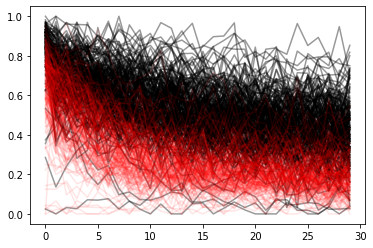

In [40]:
# plot to see individuals
msr='RevFreq'
plt.figure()
normal = df.index.get_level_values(1) == '0mM'
alcohol = df.index.get_level_values(1) == '400mM'
plt.plot(df[msr].loc[normal].values.transpose(), color='black', alpha=0.4)
plt.plot(df[msr].loc[alcohol].values.transpose(), color='red', alpha=0.1)
plt.show()